<a href="https://colab.research.google.com/github/bpalani/blyss-genai-apps/blob/main/google-vertexai/RAG/RAG_langchain_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Setting up virtual env
!pip install virtualenv
!virtualenv myenv
!source myenv/bin/activate;

created virtual environment CPython3.11.12.final.0-64 in 666ms
  creator CPython3Posix(dest=/content/myenv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==25.0.1, setuptools==78.1.0, wheel==0.45.1
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [2]:
#Install Langchain, Langgraph, VertexAI and other required packages
!pip install langchain langchain_core langchain_community langgraph
!pip install langchain_google_vertexai
#!pip install langchain_text_splitters
#!pip install pypdf
#!pip install chromadb
#!pip install beautifulsoup4
!pip install setuptools
!pip install duckduckgo-search

In [3]:
#Authenticate your notebook environment
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

In [4]:
# Initialize VertexAI
from langchain_google_vertexai import VertexAI
from langchain_google_vertexai.chat_models import ChatVertexAI

import os

PROJECT_ID = os.environ.get("GOOGLE_CLOUD_PROJECT","hybrid-poetry-455521-a1")

LOCATION = os.environ.get("GOOGLE_CLOUD_REGION", "us-central1")

import vertexai

# Initialize Vertex AI SDK
vertexai.init(project=PROJECT_ID, location=LOCATION)

In [5]:
from IPython.display import Markdown, display
import requests
from vertexai.generative_models import (
    FunctionDeclaration,
    GenerationConfig,
    GenerativeModel,
    Part,
    Tool,
)
# LLM model
llm = VertexAI(
    model_name="gemini-2.0-flash",
    verbose=True,
)


In [6]:
from google.colab import userdata
aakey = userdata.get('AA_API_KEY')


In [7]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [8]:
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge( "chatbot",END)

graph = graph_builder.compile()

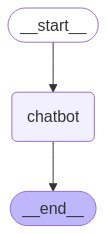

In [9]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass